In [1]:
import sys 
import os 

project_root=os.path.abspath(os.path.join(os.getcwd(),".."))
sys.path.append(os.path.join(project_root,"src"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from data_loader import fetch_stock_data
from preprocessing import preprocessing_data
from hmm_model import train_hmm

In [3]:
stock_data=fetch_stock_data()

np.random.seed(42)

hmm_model,hmm_hidden_states=train_hmm(stock_data)



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
np.random.seed(42)
print(len(stock_data["Date"][1:]))
log_returns_preprocessed=preprocessing_data(stock_data).values.flatten()
print(len(hmm_hidden_states))
print(len(log_returns_preprocessed))

5032
5032
5032


c:\Users\ANKUR SHARMA\OneDrive - iitkgp.ac.in\Desktop\Projects\HMMs_StockMarket\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ANKUR SHARMA\OneDrive - iitkgp.ac.in\Desktop\Projects\HMMs_StockMarket\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ANKUR SHARMA\OneDrive - iitkgp.ac.in\Desktop\Projects\HMMs_StockMarket\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ANKUR SHARMA\OneDrive - iitkgp.ac.in\Desktop\Projects\HMMs_StockMarket\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128059 (\N{BEAR FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


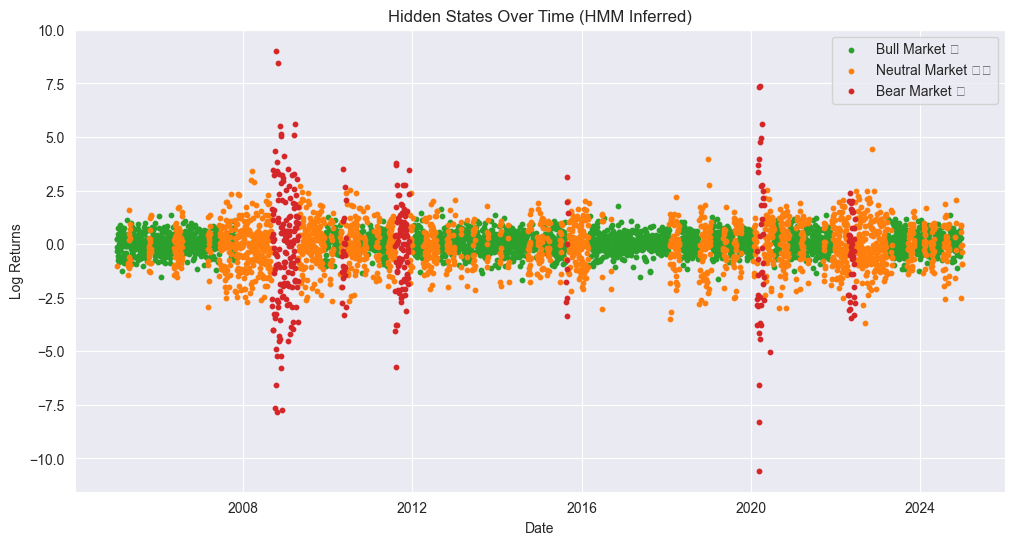

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure reproducibility
np.random.seed(42)

# Create DataFrame
df = pd.DataFrame({
    "Date": stock_data["Date"][1:],  # Drop first date to match log returns length
    "Log Returns": log_returns_preprocessed, 
    "State": hmm_hidden_states
}).copy()

sns.set_style("darkgrid")

# Get state means and variances
state_means = np.array(hmm_model.means_).flatten()
state_variances = np.array([cov[0][0] for cov in hmm_model.covars_])

# Sort states based on mean returns (ascending order)
sorted_states = np.argsort(state_means)

# Assign labels dynamically
state_labels = {
    sorted_states[0]: "Bear Market 🐻",   # Lowest mean return
    sorted_states[1]: "Neutral Market ⚖️",  # Middle mean return
    sorted_states[2]: "Bull Market 🚀"    # Highest mean return
}

# Define color mapping (consistent)
palette = {
    "Bear Market 🐻": "#d62728",    # Red for bear market (high risk)
    "Neutral Market ⚖️": "#ff7f0e", # Orange for neutral
    "Bull Market 🚀": "#2ca02c"    # Green for bull market (growth)
}

# Plot hidden states over time
plt.figure(figsize=(12, 6))

for state in range(hmm_model.n_components):
    state_mask = df["State"] == state
    label = state_labels[state]  # Get proper label for state
    plt.scatter(df.loc[state_mask, "Date"], df.loc[state_mask, "Log Returns"], 
                label=label, color=palette[label], s=10)

plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title("Hidden States Over Time (HMM Inferred)")
plt.legend()
plt.show()


c:\Users\ANKUR SHARMA\OneDrive - iitkgp.ac.in\Desktop\Projects\HMMs_StockMarket\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ANKUR SHARMA\OneDrive - iitkgp.ac.in\Desktop\Projects\HMMs_StockMarket\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ANKUR SHARMA\OneDrive - iitkgp.ac.in\Desktop\Projects\HMMs_StockMarket\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ANKUR SHARMA\OneDrive - iitkgp.ac.in\Desktop\Projects\HMMs_StockMarket\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128059 (\N{BEAR FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


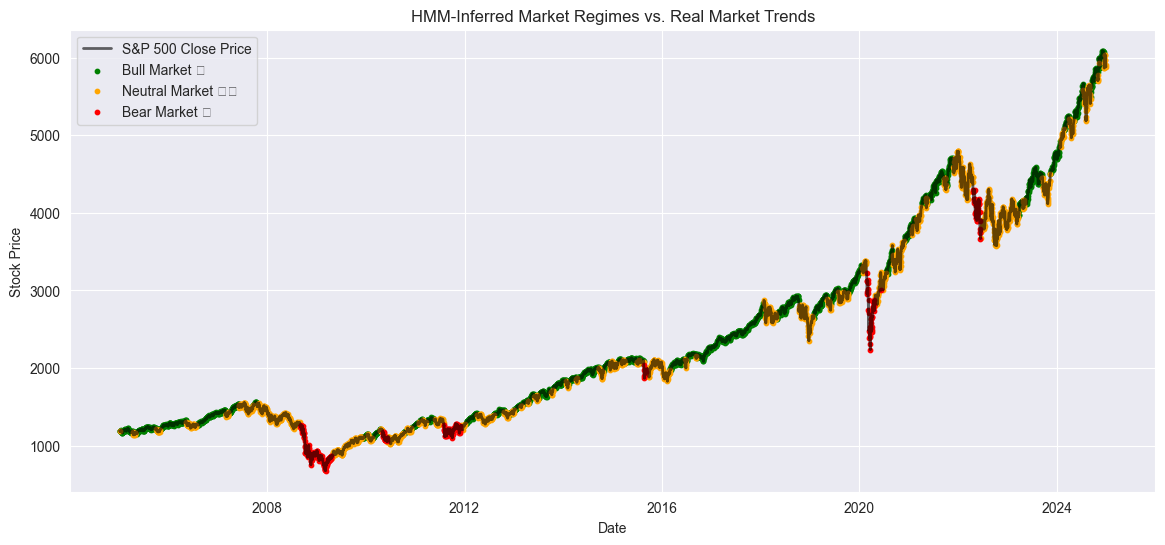

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date is in correct format
df["Date"] = pd.to_datetime(df["Date"])
stock_data["Date"] = pd.to_datetime(stock_data["Date"])

# Merge stock prices with HMM-inferred states
df = df.merge(stock_data[["Date", "Close"]], on="Date", how="left")

# Set up plot
plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")

# Plot stock prices in the background
plt.plot(df["Date"], df["Close"], color="black", label="S&P 500 Close Price", alpha=0.6, linewidth=2)

# Define colors for each state (sorted by mean log return)
state_colors = {sorted_states[0]: "red", sorted_states[1]: "orange", sorted_states[2]: "green"}
state_labels = {sorted_states[0]: "Bear Market 🐻", sorted_states[1]: "Neutral Market ⚖️", sorted_states[2]: "Bull Market 🚀"}

# Overlay HMM states
for state in range(hmm_model.n_components):
    state_mask = df["State"] == state
    plt.scatter(df["Date"][state_mask], df["Close"][state_mask], 
                label=state_labels[state], color=state_colors[state], s=10)

# Labels & Title
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("HMM-Inferred Market Regimes vs. Real Market Trends")
plt.legend()
plt.show()


In [7]:
## Plotting the Transtion matrix to see probabilites of changing states 

transitionMatrix=hmm_model.transmat_
print(transitionMatrix)

[[9.70344766e-01 2.96552247e-02 8.86096220e-09]
 [3.62330369e-02 9.57447345e-01 6.31961763e-03]
 [1.02457234e-18 3.47575717e-02 9.65242428e-01]]


In [8]:
##Checking if the transition matrix is stocastic row matrix 

print(np.sum(transitionMatrix,axis=1))

[1. 1. 1.]


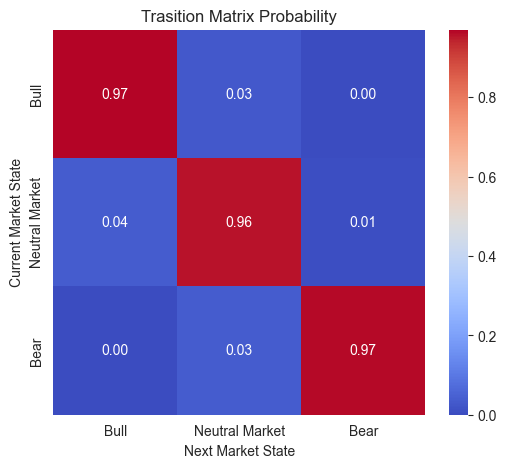

In [13]:
plt.figure(figsize=(6,5))

sns.heatmap(data=transitionMatrix,annot=True,fmt=".2f",cmap="coolwarm",xticklabels=["Bull","Neutral Market","Bear"],yticklabels=["Bull","Neutral Market","Bear"])
plt.title("Trasition Matrix Probability")
plt.xlabel("Next Market State")
plt.ylabel("Current Market State")
plt.show()

In [14]:
df["Daily Return"] = df["Close"].pct_change()  # Compute daily returns
state_returns = df.groupby("State")["Daily Return"].mean()
print("Mean Returns per State:\n", state_returns)


Mean Returns per State:
 State
0    0.001086
1   -0.000048
2   -0.002409
Name: Daily Return, dtype: float64


In [ ]:
current_state_probability=hmm_model.predict_proba(log_returns_preprocessed.reshape(-1,1))[-1]
print(f"Current State Probabilty is: {current_state_probability}") ## Uses Forward Algorithm

## Predicting the next day probabilites using the transition Matrix 
## Next Day Probability=np.dot(current_state_probability,transitionMatix)

import numpy as np
nextDayProb=np.dot(current_state_probability,transitionMatrix)
print(f"Next day probability:{nextDayProb}")




Current State Probabilty is: [0.09201651 0.90285083 0.00513266]
Next day probability:[0.12200076 0.8673393  0.01065994]


**Current day probability indicate that the market is in Neutral State. Next day Probability can be calculated by calculating N=C.Q where<br>
Q is transition matix. On the similar note n-Step Markov property can be calculated by raising Transition Matrix by power n**

c:\Users\ANKUR SHARMA\OneDrive - iitkgp.ac.in\Desktop\Projects\HMMs_StockMarket\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ANKUR SHARMA\OneDrive - iitkgp.ac.in\Desktop\Projects\HMMs_StockMarket\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ANKUR SHARMA\OneDrive - iitkgp.ac.in\Desktop\Projects\HMMs_StockMarket\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ANKUR SHARMA\OneDrive - iitkgp.ac.in\Desktop\Projects\HMMs_StockMarket\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128059 (\N{BEAR FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


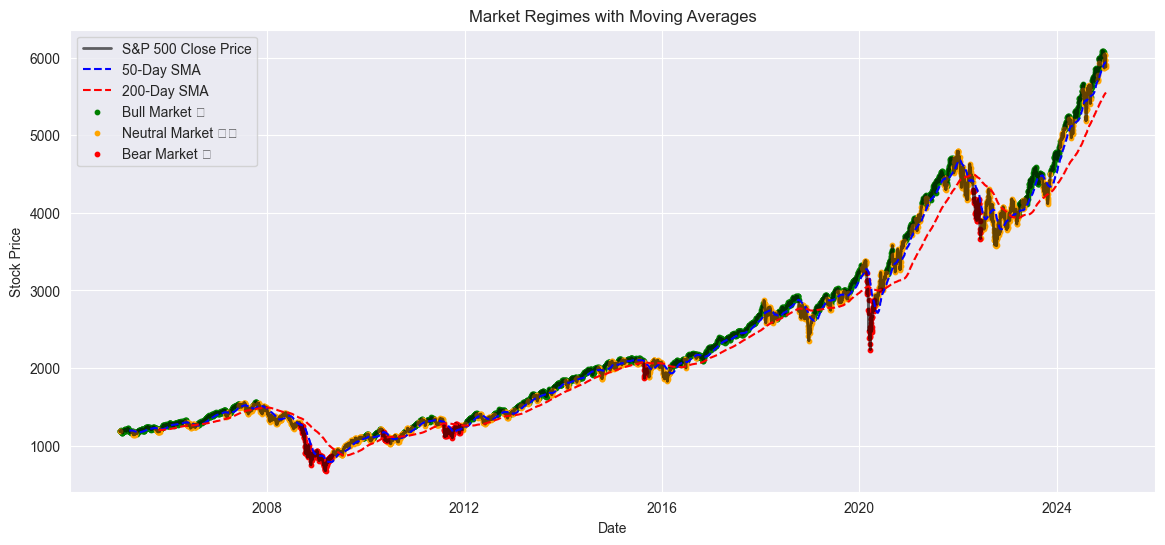

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute Moving Average of Closing Prices
df["SMA_50"] = df["Close"].rolling(window=50).mean()  # 50-day Simple Moving Average
df["SMA_200"] = df["Close"].rolling(window=200).mean()  # 200-day Simple Moving Average

# Plot stock prices with moving averages
plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")

# Plot stock prices
plt.plot(df["Date"], df["Close"], label="S&P 500 Close Price", color="black", alpha=0.6, linewidth=2)

# Plot moving averages
plt.plot(df["Date"], df["SMA_50"], label="50-Day SMA", color="blue", linestyle="dashed", linewidth=1.5)
plt.plot(df["Date"], df["SMA_200"], label="200-Day SMA", color="red", linestyle="dashed", linewidth=1.5)

# Define colors for each state (sorted by mean log return)
state_colors = {sorted_states[0]: "red", sorted_states[1]: "orange", sorted_states[2]: "green"}
state_labels = {sorted_states[0]: "Bear Market 🐻", sorted_states[1]: "Neutral Market ⚖️", sorted_states[2]: "Bull Market 🚀"}

# Overlay HMM states
for state in range(hmm_model.n_components):
    state_mask = df["State"] == state
    plt.scatter(df["Date"][state_mask], df["Close"][state_mask], 
                label=state_labels[state], color=state_colors[state], s=10)

# Labels & Title
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Market Regimes with Moving Averages")
plt.legend()
plt.show()


## 🔹 Market Regimes with Moving Averages

### **📌 What This Code Does**
1. **Computes Moving Averages:**
   - `SMA_50`: 50-day Simple Moving Average (short-term trend)
   - `SMA_200`: 200-day Simple Moving Average (long-term trend)
  
2. **Plots Stock Prices:**
   - Actual closing prices are plotted in **black**.

3. **Plots Moving Averages:**
   - **Blue dashed line** → 50-day SMA (short-term trend)
   - **Red dashed line** → 200-day SMA (long-term trend)

4. **Overlays HMM-Inferred Market Regimes:**
   - Dots represent stock prices, colored based on HMM states:
     - **Red (Bear Market 🐻)**
     - **Orange (Neutral Market ⚖️)**
     - **Green (Bull Market 🚀)**

---

### **📌 What is a Moving Average (SMA)?**
A **Moving Average (MA)** smooths out stock price fluctuations by averaging past prices.  
- **SMA_50 (Short-Term)** → Reacts quickly to price changes.  
- **SMA_200 (Long-Term)** → Moves slower, showing overall trend direction.  

#### **💡 Key Trading Insights from Moving Averages**
✅ **Golden Cross (Bullish Signal):**  
   - **SMA_50 crosses above SMA_200** → Signals a potential **bull market**.  

✅ **Death Cross (Bearish Signal):**  
   - **SMA_50 crosses below SMA_200** → Indicates a potential **bear market**.  

---

### **📌 How Do We Interpret HMM from This Plot?**
1. **Compare HMM States with Moving Averages:**  
   - If **bullish states (green dots) appear when SMA_50 > SMA_200**, HMM correctly identifies **bull markets**.  
   - If **bearish states (red dots) appear when SMA_50 < SMA_200**, HMM correctly captures **bear markets**.  

2. **Check for False Signals:**  
   - If HMM assigns a **bullish state** when **SMA_50 < SMA_200**, it may be overfitting.  
   - If HMM assigns a **bearish state** when **SMA_50 crosses above SMA_200**, it may lag behind.  

3. **Trend Confirmation:**  
   - If moving averages align with HMM states, we gain confidence in our model.  
   - If there’s a mismatch, we might need to **tune the HMM** (e.g., adjust the number of states, retrain on different timeframes).  

---

  

In [25]:
import numpy as np

# Get the transition probability matrix (P) from the trained HMM
P = hmm_model.transmat_

# Solve for the stationary distribution (π)
eigvals, eigvecs = np.linalg.eig(P.T)  # Get eigenvalues & eigenvectors
stationary_dist = np.real(eigvecs[:, np.isclose(eigvals, 1)])  # Find eigenvector for eigenvalue 1
stationary_dist = stationary_dist / stationary_dist.sum()  # Normalize

# Convert to 1D array
stationary_dist = stationary_dist.flatten()

print("Stationary Distribution:", stationary_dist)


Stationary Distribution: [0.50831846 0.41603752 0.07564402]


# 📊 **Stationary Distribution Analysis of Market Regimes**

## **🔹 Computed Stationary Distribution:**
| Market Regime  | Probability |
|---------------|------------|
| 🟢 **Bull Market** (State 0) | **50.83%** |
| 🟠 **Neutral Market** (State 1) | **41.60%** |
| 🔴 **Bear Market** (State 2) | **7.56%** |

---

## **🔍 Key Inferences:**
1. **Bull Market Dominance 🟢**
   - The probability of being in a **Bull Market** is **50.83%**, suggesting that the market spends the majority of its time in an uptrend.
   - This aligns with the general historical trend where markets tend to rise over the long term.

2. **Frequent Neutral Market 🟠**
   - The **Neutral Market** state has a probability of **41.60%**, indicating that the market often moves sideways without a clear bullish or bearish trend.
   - This state could represent consolidation phases, low volatility periods, or market indecision.

3. **Rare Bear Market 🔴**
   - The probability of a **Bear Market** is just **7.56%**, implying that **severe market downturns are relatively rare**.
   - This aligns with historical market behavior where bearish phases are typically shorter compared to bullish periods.

---

## **📌 Takeaway**
- **The market is in a bullish or neutral state nearly 92.43% of the time**, reinforcing the idea that stock markets trend upwards over the long run.
- **Bear markets, while impactful, are not the norm** and represent a much smaller fraction of the overall market timeline.

---

📉 **This stationary distribution provides a long-term perspective on how the market transitions between different regimes, helping in risk assessment, portfolio strategy, and investment decisions.** 🚀
